---
# 19CSE304 - Foundations of Data Science
# Final Assignment (FoDS)
---
- Roll No. : CB.EN.U4CSE20208
- Name : Aravind S
---

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Question-1

- Datasets taken from <a> https://github.com/jakevdp/data-USstates </a>
    - state-abbrevs.csv
    - state-areas.csv
    - state-population.csv

In [302]:
population = pd.read_csv('1-state-population.csv')
areas = pd.read_csv('1-state-areas.csv')
abbrevs = pd.read_csv('1-state-abbrevs.csv')

In [303]:
print("population : \n", population.head())
print("Areas : \n", areas.head())
print("Abbreviations : \n", abbrevs.head())

population : 
   state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
Areas : 
         state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
Abbreviations : 
         state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


### Merging

In [304]:
merged = pd.merge(population, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [305]:
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


### Checking for null values

In [306]:
 merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           96
dtype: int64

- population and state have missing values

In [307]:
merged[merged.isnull().any(axis=1)] # to check all the null rows

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


### Filling the state column

In [308]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [309]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state            0
dtype: int64

### Filling the population column

In [310]:
merged[merged.isnull().any(axis=1)]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,Puerto Rico
2449,PR,total,1990,NaN,Puerto Rico
2450,PR,total,1991,NaN,Puerto Rico
2451,PR,under18,1991,NaN,Puerto Rico
2452,PR,total,1993,NaN,Puerto Rico
2453,PR,under18,1993,NaN,Puerto Rico
2454,PR,under18,1992,NaN,Puerto Rico
2455,PR,total,1992,NaN,Puerto Rico
2456,PR,under18,1994,NaN,Puerto Rico
2457,PR,total,1994,NaN,Puerto Rico


In [311]:
 main = pd.merge(merged, areas, on='state', how='left')
 main

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [312]:
main.isnull().sum()

state/region      0
ages              0
year              0
population       20
state             0
area (sq. mi)    48
dtype: int64

In [313]:
main['state'][main['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [314]:
main.dropna(inplace=True)
main.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [315]:
main.isnull().sum()

state/region     0
ages             0
year             0
population       0
state            0
area (sq. mi)    0
dtype: int64

### Groupby, concat, aggregate

In [316]:
main.groupby('state/region')[['population']].mean()

,population
state/region,
AK,4.164389e+05
AL,2.797862e+06
AR,1.686640e+06
AZ,3.337577e+06
CA,2.170908e+07
CO,2.727803e+06
CT,2.128442e+06
DC,3.496533e+05
DE,4.979201e+05


In [317]:
main.groupby(['state/region','ages'])['population'].aggregate('mean').unstack()

ages,total,under18
state/region,,
AK,6.462048e+05,1.866730e+05
AL,4.484528e+06,1.111197e+06
AR,2.693178e+06,6.801024e+05
AZ,5.294600e+06,1.380554e+06
CA,3.433414e+07,9.084020e+06
CO,4.359393e+06,1.096213e+06
CT,3.440903e+06,8.159816e+05
DC,5.870693e+05,1.122373e+05
DE,8.029724e+05,1.928678e+05


In [318]:
pd.concat([population,abbrevs,areas])

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012.0,1117489.0,NaN,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
47,NaN,NaN,NaN,NaN,West Virginia,NaN,24231.0
48,NaN,NaN,NaN,NaN,Wisconsin,NaN,65503.0
49,NaN,NaN,NaN,NaN,Wyoming,NaN,97818.0
50,NaN,NaN,NaN,NaN,District of Columbia,NaN,68.0


### append

In [319]:
df=population
df

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [320]:
df.append(abbrevs)

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012.0,1117489.0,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN
...,...,...,...,...,...,...
46,NaN,NaN,NaN,NaN,Virginia,VA
47,NaN,NaN,NaN,NaN,Washington,WA
48,NaN,NaN,NaN,NaN,West Virginia,WV
49,NaN,NaN,NaN,NaN,Wisconsin,WI


In [321]:
df.append(areas)

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012.0,1117489.0,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN
...,...,...,...,...,...,...
47,NaN,NaN,NaN,NaN,West Virginia,24231.0
48,NaN,NaN,NaN,NaN,Wisconsin,65503.0
49,NaN,NaN,NaN,NaN,Wyoming,97818.0
50,NaN,NaN,NaN,NaN,District of Columbia,68.0


### count, mean, median, 

In [322]:
main.describe()

,year,population,area (sq. mi)
count,2476.000000,2.476000e+03,2476.000000
mean,2001.556543,3.482132e+06,73452.686591
std,6.917905,4.986552e+06,94687.159589
min,1990.000000,1.013090e+05,68.000000
25%,1996.000000,7.306692e+05,35387.000000
50%,2002.000000,1.557804e+06,56276.000000
75%,2008.000000,4.373440e+06,84904.000000
max,2013.000000,3.833252e+07,656425.000000


In [323]:
main.count()

state/region     2476
ages             2476
year             2476
population       2476
state            2476
area (sq. mi)    2476
dtype: int64

In [324]:
main.mean()

year             2.001557e+03
population       3.482132e+06
area (sq. mi)    7.345269e+04
dtype: float64

In [325]:
main.median()

year                2002.0
population       1557803.5
area (sq. mi)      56276.0
dtype: float64

In [326]:
main.min()

state/region           AK
ages                total
year                 1990
population       101309.0
state             Alabama
area (sq. mi)        68.0
dtype: object

In [327]:
main.max()

state/region             WY
ages                under18
year                   2013
population       38332521.0
state               Wyoming
area (sq. mi)      656425.0
dtype: object

In [328]:
main.std()

year             6.917905e+00
population       4.986552e+06
area (sq. mi)    9.468716e+04
dtype: float64

In [329]:
main.var()

year             4.785741e+01
population       2.486570e+13
area (sq. mi)    8.965658e+09
dtype: float64

In [330]:
main.mad()

year             5.991466e+00
population       3.126783e+06
area (sq. mi)    4.740079e+04
dtype: float64

In [331]:
main.prod()

year             0.0
population       inf
area (sq. mi)    inf
dtype: float64

### groupby sum, 

In [332]:
main.groupby('population').sum()

,year,area (sq. mi)
population,,
101309.0,2010,68.0
102098.0,2009,68.0
102257.0,2008,68.0
103906.0,2011,68.0
104126.0,2007,68.0
...,...,...
36961229.0,2009,163707.0
37333601.0,2010,163707.0
37668681.0,2011,163707.0


In [333]:
main.groupby('area (sq. mi)').transform(lambda x: x - x.mean())

,year,population
0,10.5,-1.680373e+06
1,10.5,2.019666e+06
2,8.5,-1.666896e+06
3,8.5,1.987708e+06
4,9.5,-1.672099e+06
...,...,...
2491,3.5,-1.470545e+06
2492,4.5,-1.498163e+06
2493,4.5,1.319090e+06
2494,5.5,-1.525750e+06


In [334]:
def function(x):
  x['population per sq.mi']=x['population']/x['area (sq. mi)'].sum()
  return x

main.groupby('state/region').apply(function)

,state/region,ages,year,population,state,area (sq. mi),population per sq.mi
0,AL,under18,2012,1117489.0,Alabama,52423.0,0.444099
1,AL,total,2012,4817528.0,Alabama,52423.0,1.914525
2,AL,under18,2010,1130966.0,Alabama,52423.0,0.449455
3,AL,total,2010,4785570.0,Alabama,52423.0,1.901825
4,AL,under18,2011,1125763.0,Alabama,52423.0,0.447388
...,...,...,...,...,...,...,...
2491,PR,under18,2010,896945.0,Puerto Rico,3515.0,9.113442
2492,PR,under18,2011,869327.0,Puerto Rico,3515.0,8.832829
2493,PR,total,2011,3686580.0,Puerto Rico,3515.0,37.457631
2494,PR,under18,2012,841740.0,Puerto Rico,3515.0,8.552530


In [335]:
main.pivot_table('population',index='year',columns='ages')

ages,total,under18
year,,
1990,4.894565e+06,1.259187e+06
1991,4.960411e+06,1.280647e+06
1992,5.029691e+06,1.304102e+06
1993,5.096443e+06,1.325391e+06
1994,5.159330e+06,1.345901e+06
1995,5.221145e+06,1.362218e+06
1996,5.282241e+06,1.377128e+06
1997,5.346018e+06,1.390603e+06
1998,5.408904e+06,1.400616e+06


### Plots

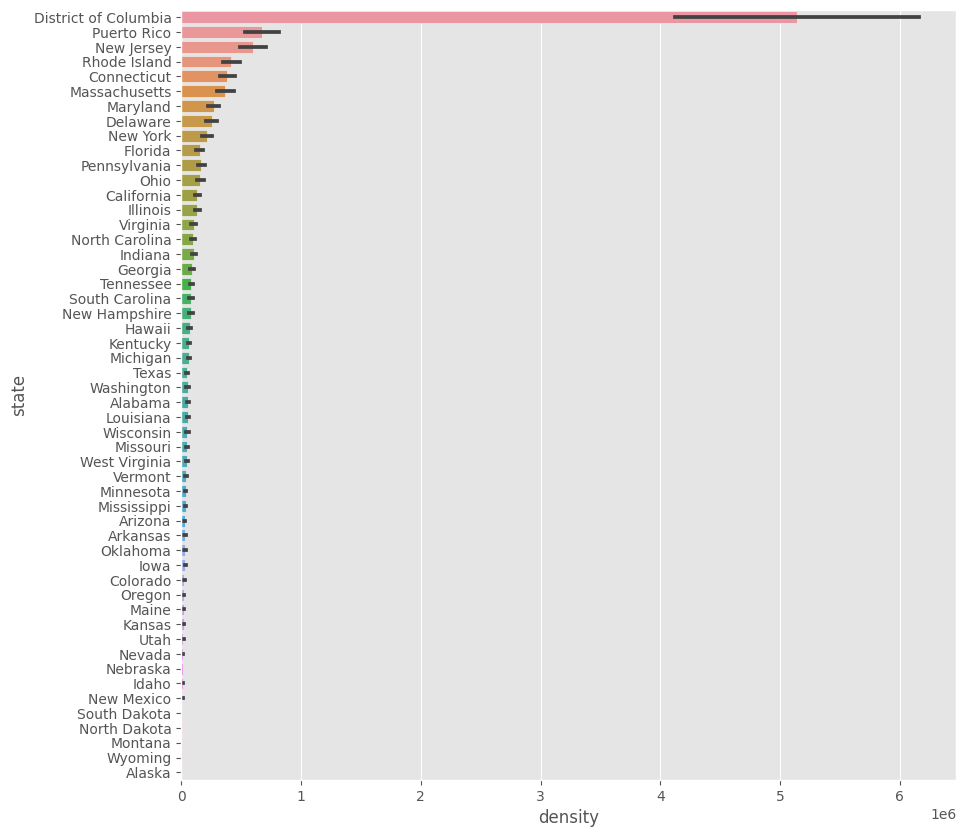

In [ ]:
#Plot the population density per state
plt.figure(figsize=(10,10))
sns.barplot(x='density', y='state', data=data)
plt.show()

- we can see high density in case of columbia

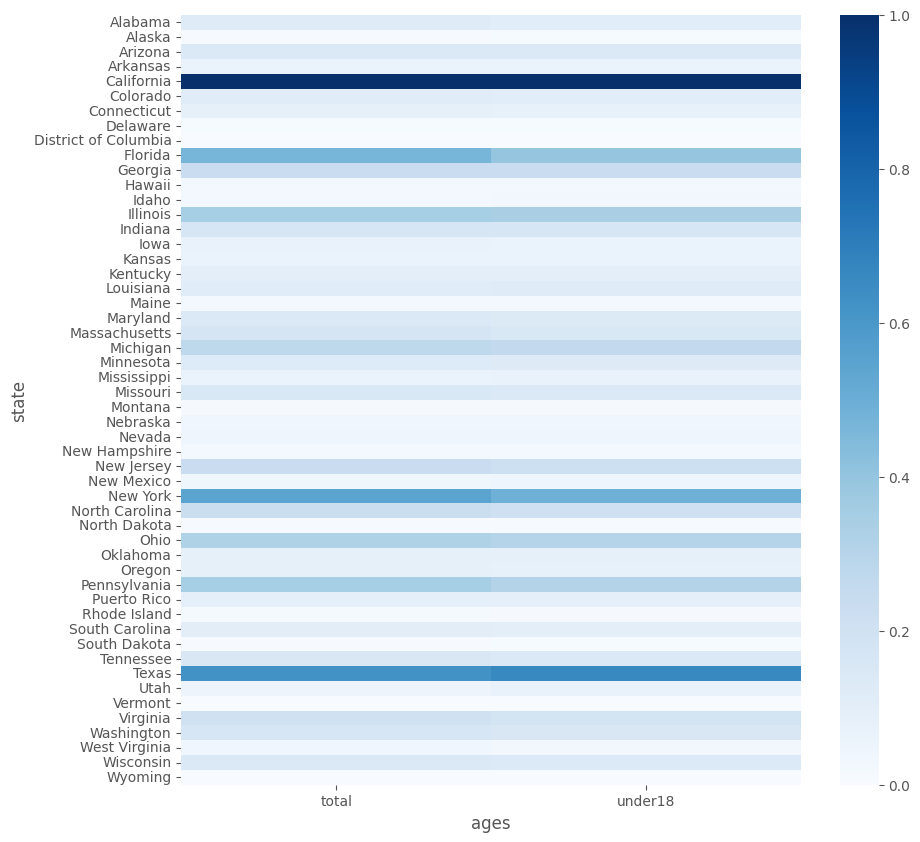

In [ ]:
#Apply dataframe to plot
plt.figure(figsize=(10,10))
sns.heatmap(data2, cmap='Blues')
plt.show()

# Question-2

- Dataset taken from
    - <a> https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/data </a>

In [336]:
df2 = pd.read_csv('2-Fremont_Bridge_Bicycle_Counter.csv',index_col='Date', parse_dates=True)
df2.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [337]:
df2.columns=['total','East','West']
df2

,total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [338]:
df2.isnull().sum()

total    14
East     14
West     14
dtype: int64

In [339]:
df2.dropna()

,total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [340]:
df2.describe()

,total,East,West
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing

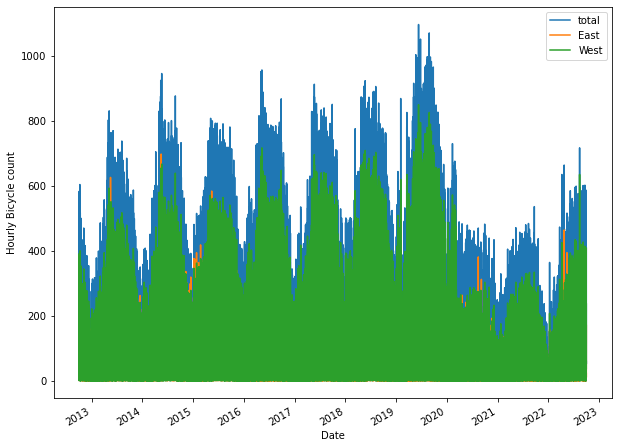

In [341]:
df2.plot(figsize=(10,8))
plt.ylabel("Hourly Bicycle count")
plt.show()

### Resampling
- Downsampling = reducing frequency
- Converting hourly data to daily

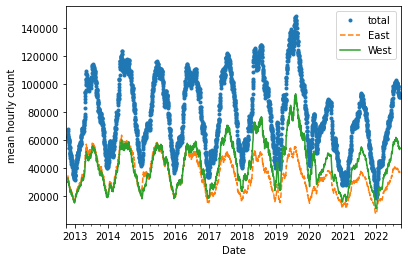

In [342]:
daily = df2.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=['.', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

- converting hourly to weekly

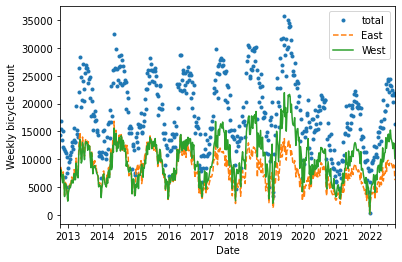

In [343]:
weekly = df2.resample("W").sum()
weekly.plot(style=['.', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

### shifting

In [344]:
shift3=df2.shift(3, axis = 0) # shifting by 3
shift3.head()

,total,East,West
Date,,,
2022-08-01 00:00:00,NaN,NaN,NaN
2022-08-01 01:00:00,NaN,NaN,NaN
2022-08-01 02:00:00,NaN,NaN,NaN
2022-08-01 03:00:00,23.0,7.0,16.0
2022-08-01 04:00:00,12.0,5.0,7.0


In [345]:
shiftneg3=df2.shift(-3, axis = 0)
shiftneg3.tail()

,total,East,West
Date,,,
2022-09-30 19:00:00,51.0,10.0,41.0
2022-09-30 20:00:00,59.0,22.0,37.0
2022-09-30 21:00:00,NaN,NaN,NaN
2022-09-30 22:00:00,NaN,NaN,NaN
2022-09-30 23:00:00,NaN,NaN,NaN


In [346]:
shiftax1=df2.shift(1, axis = 1)
shiftax1.head()

,total,East,West
Date,,,
2022-08-01 00:00:00,NaN,23.0,7.0
2022-08-01 01:00:00,NaN,12.0,5.0
2022-08-01 02:00:00,NaN,3.0,0.0
2022-08-01 03:00:00,NaN,5.0,2.0
2022-08-01 04:00:00,NaN,10.0,2.0


In [347]:
shiftaxneg1=df2.shift(-1, axis = 1)
shiftaxneg1.head()

,total,East,West
Date,,,
2022-08-01 00:00:00,7.0,16.0,NaN
2022-08-01 01:00:00,5.0,7.0,NaN
2022-08-01 02:00:00,0.0,3.0,NaN
2022-08-01 03:00:00,2.0,3.0,NaN
2022-08-01 04:00:00,2.0,8.0,NaN


In [348]:
df2.isna().sum()

total    14
East     14
West     14
dtype: int64

### Plots for shift, tshift

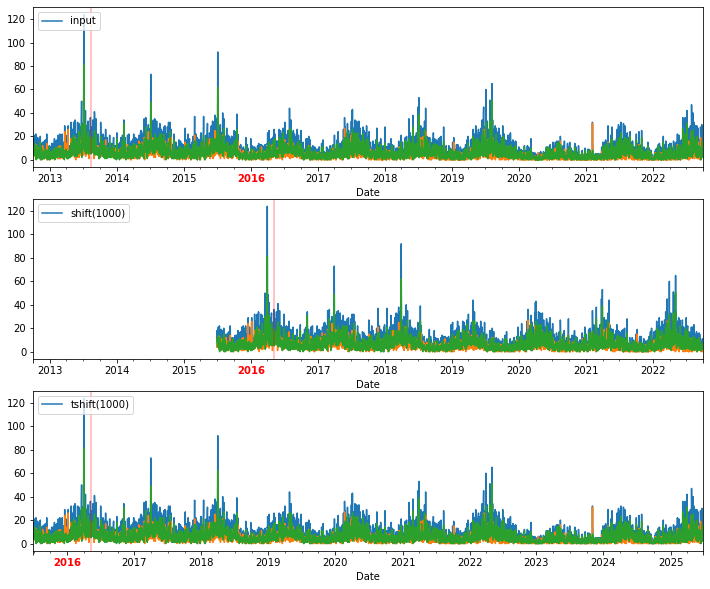

In [349]:
fig, ax = plt.subplots(3, sharey=True)

df2plt = df2.asfreq('D')
df2plt.plot(ax=ax[0],figsize=(12,10))
df2plt.shift(1000).plot(ax=ax[1])
df2plt.tshift(1000).plot(ax=ax[2])

local_max = pd.to_datetime('2013-08-12')
offset = pd.Timedelta(1000, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')


ax[1].legend(['shift(1000)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')


ax[2].legend(['tshift(1000)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

### Rolling mean

In [350]:
df2['MA_3'] = df2['total'].rolling(3).sum()
df2

,total,East,West,MA_3
Date,,,,
2022-08-01 00:00:00,23.0,7.0,16.0,NaN
2022-08-01 01:00:00,12.0,5.0,7.0,NaN
2022-08-01 02:00:00,3.0,0.0,3.0,38.0
2022-08-01 03:00:00,5.0,2.0,3.0,20.0
2022-08-01 04:00:00,10.0,2.0,8.0,18.0
...,...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0,844.0
2022-09-30 20:00:00,73.0,33.0,40.0,507.0
2022-09-30 21:00:00,69.0,30.0,39.0,310.0


In [351]:
df2.drop(['MA_3'],axis=1)

,total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


### diff plots

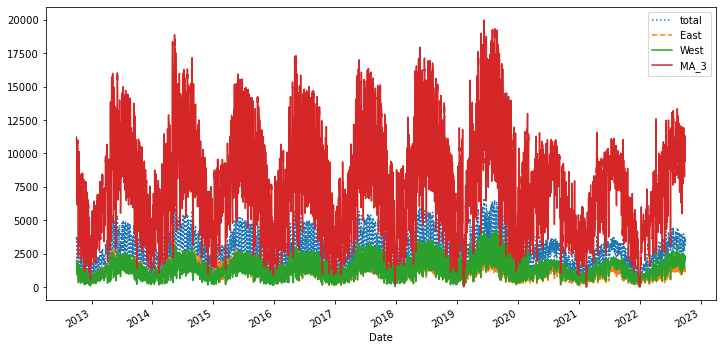

In [352]:
df2.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'],figsize=(12,6));

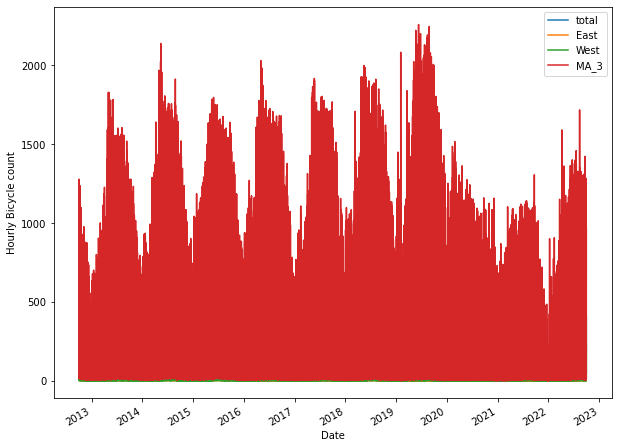

In [353]:
df2.plot(figsize=(10,8))
plt.ylabel("Hourly Bicycle count")
plt.show()

<AxesSubplot: xlabel='time'>

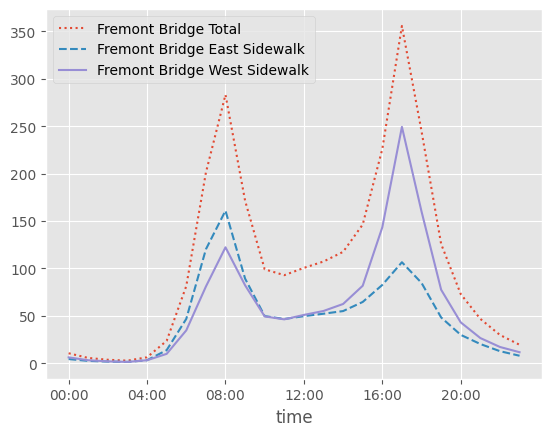

In [ ]:
by_time = bic.groupby(bic.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

<AxesSubplot: >

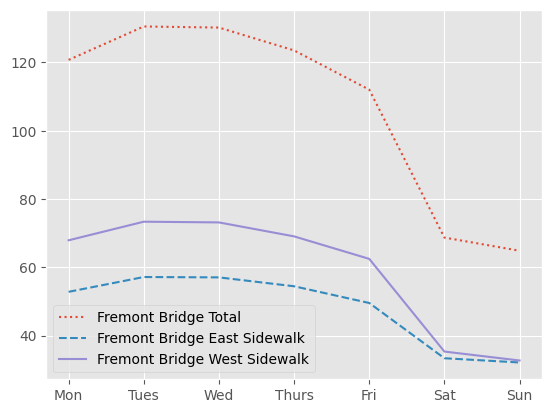

In [ ]:
by_weekday = bic.groupby(bic.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

<AxesSubplot:xlabel='Date'>

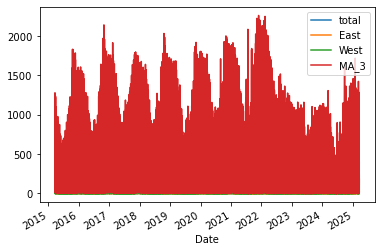

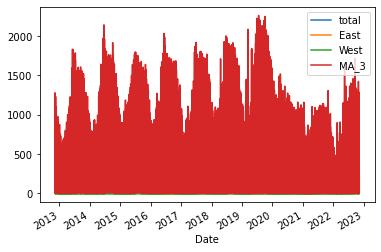

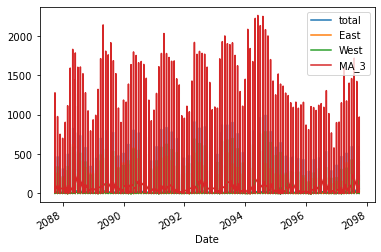

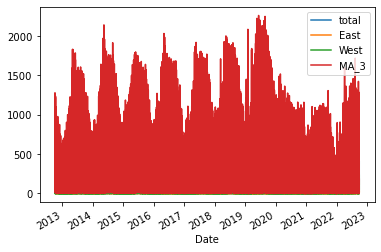

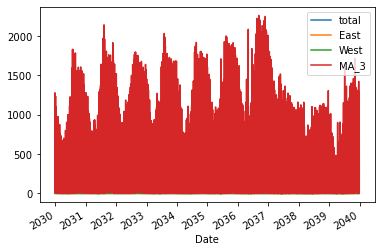

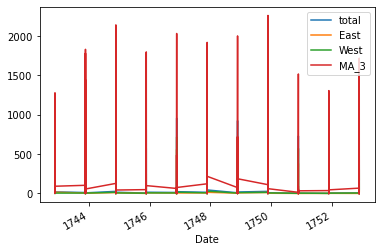

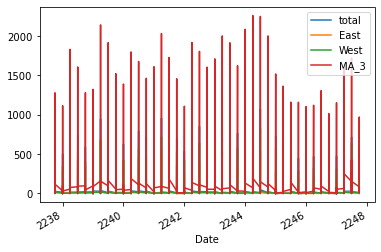

In [354]:
df2.tshift(900, freq='D').plot()

df2.tshift(900, freq='H').plot()

df2.tshift(900, freq='M').plot()

df2.tshift(900, freq='S').plot()

df2.tshift(900, freq='W').plot()

df2.tshift(900, freq='Y').plot()

df2.tshift(900, freq='Q').plot()

# Question-3

In [355]:
df3=pd.read_csv('3-stock_px_2.csv',index_col=0,parse_dates=True)
df3

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [356]:
df3['MSFT'].loc['2003-01-08']

21.31

In [357]:
df3.loc[:,['AAPL']]

,AAPL
2003-01-02,7.40
2003-01-03,7.45
2003-01-06,7.45
2003-01-07,7.43
2003-01-08,7.28
...,...
2011-10-10,388.81
2011-10-11,400.29
2011-10-12,402.19
2011-10-13,408.43


In [358]:
df3.loc['2010'].count()

AAPL    252
MSFT    252
XOM     252
SPX     252
dtype: int64

In [359]:
df3.loc['2010-05'].count()

AAPL    20
MSFT    20
XOM     20
SPX     20
dtype: int64

In [360]:
df3['SPX'][df3['SPX']>1200] # putting in conditions

2004-12-14    1203.38
2004-12-15    1205.72
2004-12-16    1203.21
2004-12-21    1205.45
2004-12-22    1209.57
               ...   
2011-09-19    1204.09
2011-09-20    1202.09
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 1036, dtype: float64

In [361]:
stock1=df3.copy()
stock1['Total']=stock1['AAPL']+stock1['SPX']+stock1['MSFT']+stock1['XOM']
stock1

,AAPL,MSFT,XOM,SPX,Total
2003-01-02,7.40,21.11,29.22,909.03,966.76
2003-01-03,7.45,21.14,29.24,908.59,966.42
2003-01-06,7.45,21.52,29.96,929.01,987.94
2003-01-07,7.43,21.93,28.95,922.93,981.24
2003-01-08,7.28,21.31,28.83,909.93,967.35
...,...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89,1686.92
2011-10-11,400.29,27.00,76.27,1195.54,1699.10
2011-10-12,402.19,26.96,77.16,1207.25,1713.56
2011-10-13,408.43,27.18,76.37,1203.66,1715.64


Text(0, 0.5, 'Year')

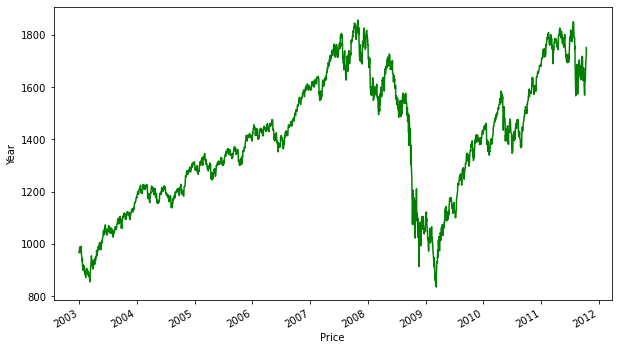

In [362]:
stock1.iloc[:,4].plot(figsize=(10,6),color='green')
plt.xlabel('Price')
plt.ylabel('Year')

Text(0, 0.5, 'stock price')

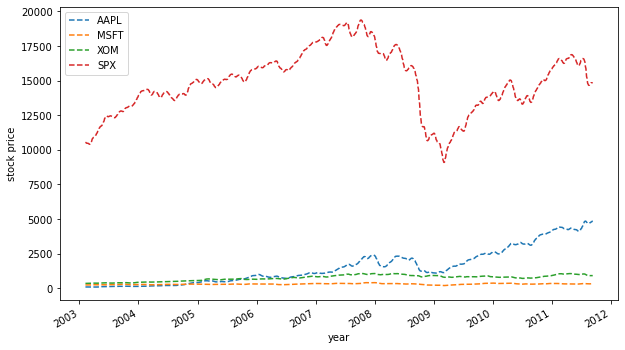

In [363]:
df3.rolling(50, center=True,win_type='gaussian').sum(std=5).plot(style= '--',figsize=(10,6));
plt.xlabel("year")
plt.ylabel("stock price")

In [364]:
from datetime import datetime

now = datetime.now().time() 

print("now =", now)

now = 22:29:58.626055


In [365]:
stock2=pd.read_csv('3-stock_px_2.csv',parse_dates=True)
#stock2
stock2['Unnamed: 0']

0       2003-01-02 00:00:00
1       2003-01-03 00:00:00
2       2003-01-06 00:00:00
3       2003-01-07 00:00:00
4       2003-01-08 00:00:00
               ...         
2209    2011-10-10 00:00:00
2210    2011-10-11 00:00:00
2211    2011-10-12 00:00:00
2212    2011-10-13 00:00:00
2213    2011-10-14 00:00:00
Name: Unnamed: 0, Length: 2214, dtype: object

In [366]:
import datetime
datetime.datetime.combine(datetime.date(2011, 1, 1), datetime.time(10, 23))

datetime.datetime(2011, 1, 1, 10, 23)

In [367]:
pd.date_range(start='2012-04-01', periods=25)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25'],
              dtype='datetime64[ns]', freq='D')

In [368]:
# frequency
pd.date_range('2000-01-01', '2000-01-04 23:59', freq='6h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 06:00:00',
               '2000-01-01 12:00:00', '2000-01-01 18:00:00',
               '2000-01-02 00:00:00', '2000-01-02 06:00:00',
               '2000-01-02 12:00:00', '2000-01-02 18:00:00',
               '2000-01-03 00:00:00', '2000-01-03 06:00:00',
               '2000-01-03 12:00:00', '2000-01-03 18:00:00',
               '2000-01-04 00:00:00', '2000-01-04 06:00:00',
               '2000-01-04 12:00:00', '2000-01-04 18:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [369]:
pd.date_range('2000-01-01', periods=15, freq='1h45min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:45:00',
               '2000-01-01 03:30:00', '2000-01-01 05:15:00',
               '2000-01-01 07:00:00', '2000-01-01 08:45:00',
               '2000-01-01 10:30:00', '2000-01-01 12:15:00',
               '2000-01-01 14:00:00', '2000-01-01 15:45:00',
               '2000-01-01 17:30:00', '2000-01-01 19:15:00',
               '2000-01-01 21:00:00', '2000-01-01 22:45:00',
               '2000-01-02 00:30:00'],
              dtype='datetime64[ns]', freq='105T')

In [370]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### shifts

In [371]:
shift1=df3.shift(1, axis = 1)
shift1.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,7.40,21.11,29.22
2003-01-03,NaN,7.45,21.14,29.24
2003-01-06,NaN,7.45,21.52,29.96
2003-01-07,NaN,7.43,21.93,28.95
2003-01-08,NaN,7.28,21.31,28.83


In [372]:
shift1=df3.shift(1, axis = 0)
shift1.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,7.40,21.11,29.22,909.03
2003-01-06,7.45,21.14,29.24,908.59
2003-01-07,7.45,21.52,29.96,929.01
2003-01-08,7.43,21.93,28.95,922.93


In [373]:
shift1=df3.shift(-2, axis = 0)
shift1.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,402.19,26.96,77.16,1207.25
2011-10-11,408.43,27.18,76.37,1203.66
2011-10-12,422.00,27.27,78.11,1224.58
2011-10-13,NaN,NaN,NaN,NaN
2011-10-14,NaN,NaN,NaN,NaN


In [374]:
shift1=df3.shift(-2, axis = 1)
shift1.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,76.28,1194.89,NaN,NaN
2011-10-11,76.27,1195.54,NaN,NaN
2011-10-12,77.16,1207.25,NaN,NaN
2011-10-13,76.37,1203.66,NaN,NaN
2011-10-14,78.11,1224.58,NaN,NaN


In [375]:
import pytz
pytz.common_timezones[-5:]


['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [376]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [377]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [378]:
rng = pd.date_range('1/6/2012 10:00', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-06 10:00:00   -0.156385
2012-01-07 10:00:00   -0.604323
2012-01-08 10:00:00   -0.722393
2012-01-09 10:00:00    0.878343
2012-01-10 10:00:00    0.508542
2012-01-11 10:00:00   -0.045184
Freq: D, dtype: float64

In [379]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-01-06 10:00:00+00:00   -0.156385
2012-01-07 10:00:00+00:00   -0.604323
2012-01-08 10:00:00+00:00   -0.722393
2012-01-09 10:00:00+00:00    0.878343
2012-01-10 10:00:00+00:00    0.508542
2012-01-11 10:00:00+00:00   -0.045184
Freq: D, dtype: float64

In [380]:
ts_utc.index

DatetimeIndex(['2012-01-06 10:00:00+00:00', '2012-01-07 10:00:00+00:00',
               '2012-01-08 10:00:00+00:00', '2012-01-09 10:00:00+00:00',
               '2012-01-10 10:00:00+00:00', '2012-01-11 10:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [381]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-01-06 10:00:00-05:00   -0.156385
2012-01-07 10:00:00-05:00   -0.604323
2012-01-08 10:00:00-05:00   -0.722393
2012-01-09 10:00:00-05:00    0.878343
2012-01-10 10:00:00-05:00    0.508542
2012-01-11 10:00:00-05:00   -0.045184
dtype: float64

In [382]:
ts_eastern.tz_convert('UTC')

2012-01-06 15:00:00+00:00   -0.156385
2012-01-07 15:00:00+00:00   -0.604323
2012-01-08 15:00:00+00:00   -0.722393
2012-01-09 15:00:00+00:00    0.878343
2012-01-10 15:00:00+00:00    0.508542
2012-01-11 15:00:00+00:00   -0.045184
dtype: float64

### Periods

In [383]:
p = pd.Period(2010, freq='A-DEC')
p

Period('2010', 'A-DEC')

In [384]:
p+10

Period('2020', 'A-DEC')

In [385]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [386]:
p.asfreq('M',how='start')

Period('2010-01', 'M')

In [387]:
p = pd.Period('2007', freq='A-JAN')
p

Period('2007', 'A-JAN')

In [388]:
p.asfreq('M', 'start')

Period('2006-02', 'M')

In [389]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [390]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [391]:
 rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [392]:
 ts = pd.Series(np.random.randn(3), index=rng)
 ts

2000-01-31    0.664466
2000-02-29   -0.486168
2000-03-31    0.118731
Freq: M, dtype: float64

In [393]:
pts=ts.to_period()
pts

2000-01    0.664466
2000-02   -0.486168
2000-03    0.118731
Freq: M, dtype: float64

In [394]:
avg_month=df3.resample('M').mean()
avg_month

,AAPL,MSFT,XOM,SPX
2003-01-31,7.239048,20.742381,28.356190,895.836190
2003-02-28,7.333684,18.786316,27.985263,837.618947
2003-03-31,7.299048,19.395238,29.065238,846.621429
2003-04-30,6.923810,19.871429,29.050476,890.025714
2003-05-31,8.885238,19.946667,29.728571,935.962857
...,...,...,...,...
2011-06-30,331.081364,24.299091,79.365909,1287.288636
2011-07-31,372.238000,26.799000,82.196500,1325.184500
2011-08-31,376.762609,25.317826,73.058696,1185.305652
2011-09-30,392.493333,25.969048,72.399524,1173.879048


Text(0, 0.5, 'monthly average of stock price')

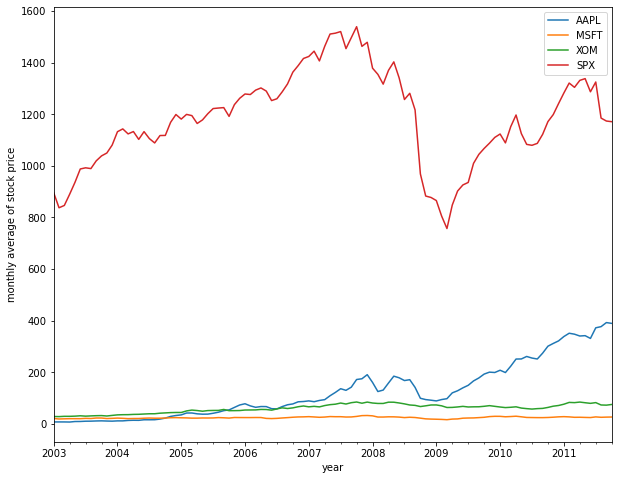

In [395]:
avg_month.plot(style='-',figsize=(10,8))
plt.xlabel("year")
plt.ylabel("monthly average of stock price")

In [396]:
sum_month=df3.resample('M').sum()
sum_month

,AAPL,MSFT,XOM,SPX
2003-01-31,152.02,435.59,595.48,18812.56
2003-02-28,139.34,356.94,531.72,15914.76
2003-03-31,153.28,407.30,610.37,17779.05
2003-04-30,145.40,417.30,610.06,18690.54
2003-05-31,186.59,418.88,624.30,19655.22
...,...,...,...,...
2011-06-30,7283.79,534.58,1746.05,28320.35
2011-07-31,7444.76,535.98,1643.93,26503.69
2011-08-31,8665.54,582.31,1680.35,27262.03
2011-09-30,8242.36,545.35,1520.39,24651.46


Text(0, 0.5, 'monthly sum of stock price')

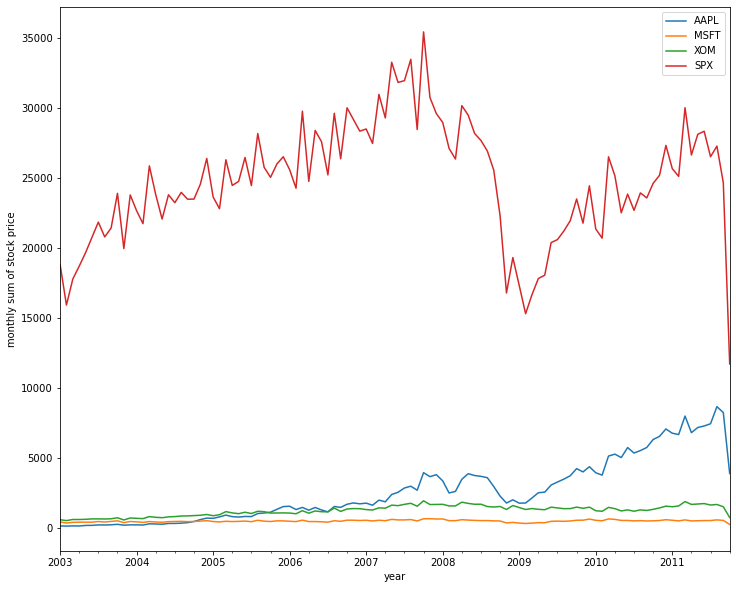

In [397]:
sum_month.plot(style='-',figsize=(12,10))
plt.xlabel("year")
plt.ylabel("monthly sum of stock price")

In [398]:
std_month=df3.resample('M').std()
std_month

,AAPL,MSFT,XOM,SPX
2003-01-31,0.173577,1.203287,0.982005,30.056188
2003-02-28,0.145190,0.400738,0.355549,10.717981
2003-03-31,0.133862,0.974862,0.529524,27.253559
2003-04-30,0.258001,0.409100,0.314269,18.846719
2003-05-31,0.634591,0.634896,0.414551,12.824100
...,...,...,...,...
2011-06-30,7.810975,0.652752,1.243006,16.078314
2011-07-31,19.197723,0.592167,1.336800,17.310910
2011-08-31,11.792712,0.896731,2.595504,44.669536
2011-09-30,12.294938,0.679838,1.444176,25.762277


Text(0, 0.5, 'monthly std of stock price')

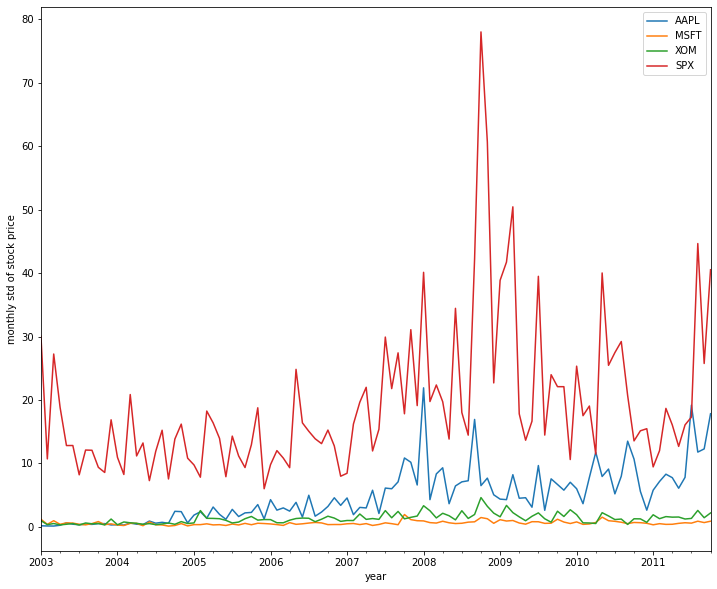

In [399]:
std_month.plot(style='-',figsize=(12,10))

plt.xlabel("year")
plt.ylabel("monthly std of stock price")

### Downsample

In [400]:
downsample=df3.resample('W',closed='right').sum()
downsample

,AAPL,MSFT,XOM,SPX
2003-01-05,14.85,42.25,58.46,1817.62
2003-01-12,36.86,108.66,146.21,4617.01
2003-01-19,36.20,108.63,144.35,4592.52
2003-01-26,27.94,80.34,109.97,3514.72
2003-02-02,36.17,95.71,136.49,4270.69
...,...,...,...,...
2011-09-18,1947.32,132.54,364.69,5948.94
2011-09-25,2043.34,130.30,358.23,5838.93
2011-10-02,1971.33,127.03,363.21,5781.21
2011-10-09,1872.52,128.35,365.38,5687.64


Text(0, 0.5, 'downsampled price of stock')

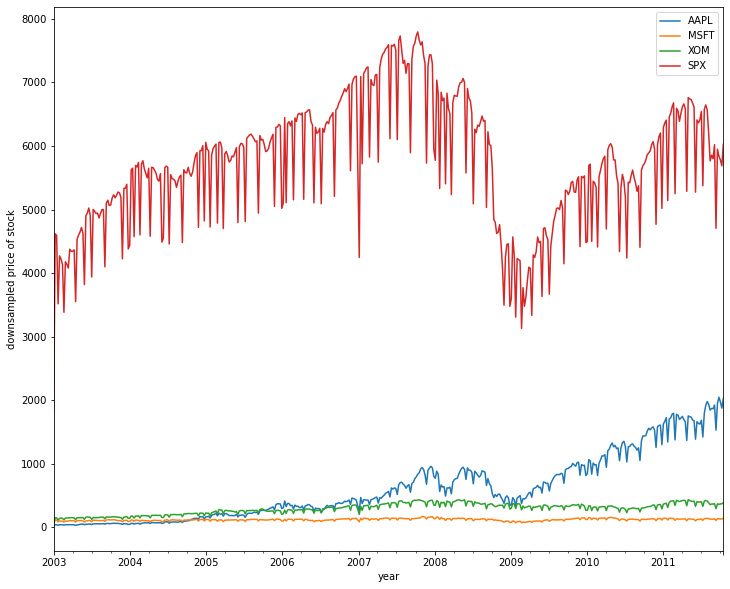

In [401]:
downsample.plot(style='-',figsize=(12,10))

plt.xlabel("year")
plt.ylabel("downsampled price of stock")

### Upsample

In [402]:
upsample=df3.resample('H')
upsample

In [403]:
df3.resample('H').ffill()

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-02 01:00:00,7.40,21.11,29.22,909.03
2003-01-02 02:00:00,7.40,21.11,29.22,909.03
2003-01-02 03:00:00,7.40,21.11,29.22,909.03
2003-01-02 04:00:00,7.40,21.11,29.22,909.03
...,...,...,...,...
2011-10-13 20:00:00,408.43,27.18,76.37,1203.66
2011-10-13 21:00:00,408.43,27.18,76.37,1203.66
2011-10-13 22:00:00,408.43,27.18,76.37,1203.66
2011-10-13 23:00:00,408.43,27.18,76.37,1203.66


Text(0, 0.5, 'Stock Price')

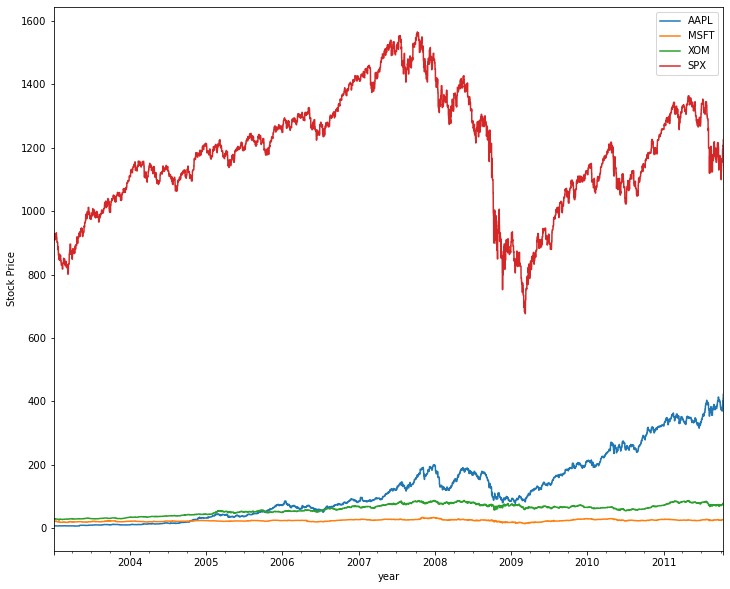

In [404]:
a=df3.resample('H').ffill()
a.plot(style='-',figsize=(12,10))

plt.xlabel("year")
plt.ylabel("Stock Price")

In [405]:
stock1=df3[['AAPL','MSFT','XOM']]
stock1=stock1.resample('B').ffill()

Text(0, 0.5, 'Apple stock price')

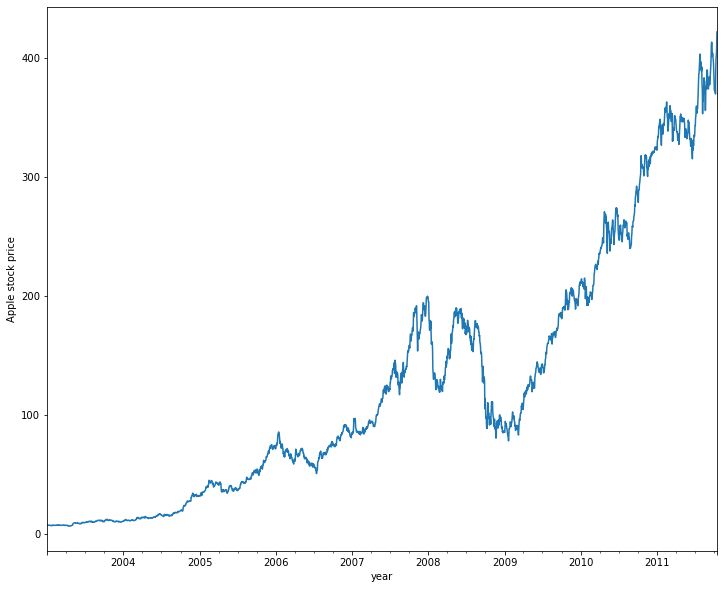

In [406]:
stock1.AAPL.plot(figsize=(12,10))
plt.xlabel("year")
plt.ylabel("Apple stock price")


Text(0, 0.5, 'Apple mean')

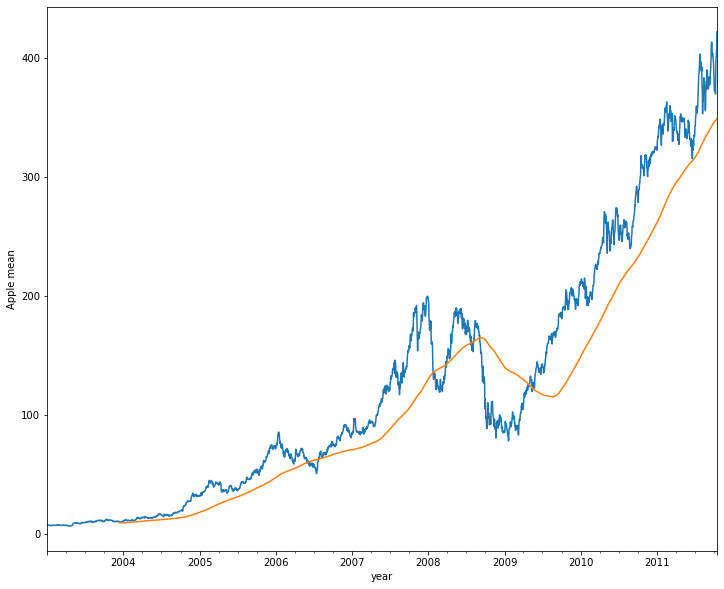

In [407]:
stock1.AAPL.plot(figsize=(12,10))
stock1.AAPL.rolling(250).mean().plot()

plt.xlabel("year")
plt.ylabel("Apple mean")


Text(0, 0.5, 'Apple std')

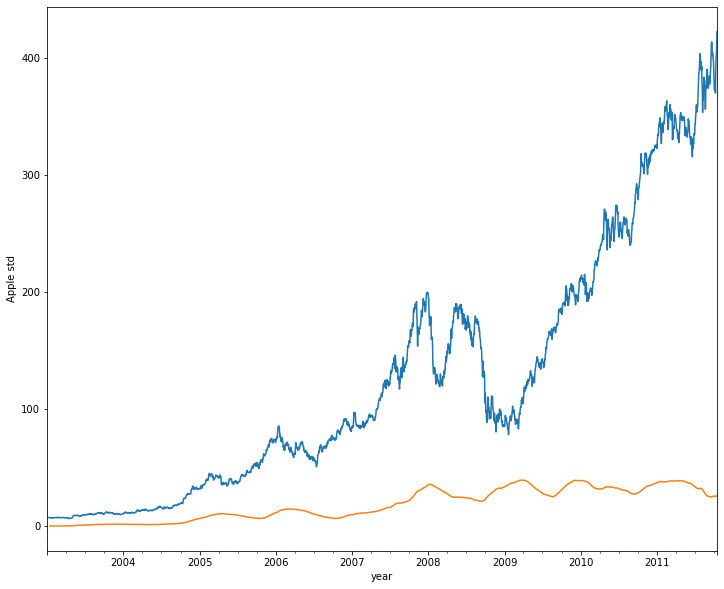

In [408]:
stock1.AAPL.plot(figsize=(12,10))
one=stock1.AAPL.rolling(250,min_periods=10).std()
one.plot(figsize=(12,10))

plt.xlabel("year")
plt.ylabel("Apple std")

Text(0, 0.5, 'year')

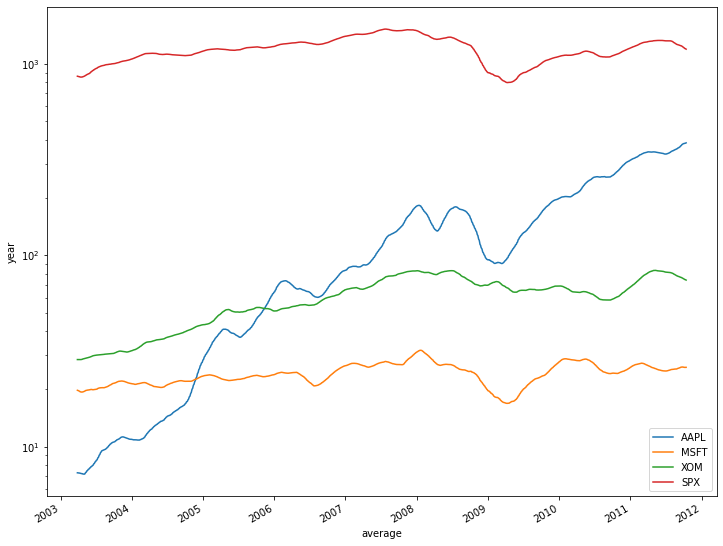

In [409]:
df3.rolling(60).mean().plot(logy=True,figsize=(12,10))

plt.xlabel("average")
plt.ylabel("year")

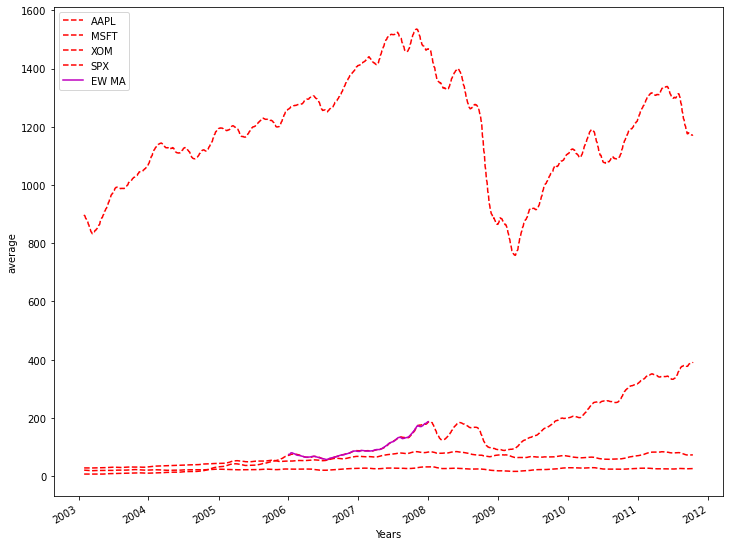

In [410]:
Apple=df3.AAPL['2006':'2007']
Moving_average60 = df3.rolling(30, min_periods=20).mean()
Exponentiallyweighted_moving_average = Apple.ewm(span=30).mean()

Moving_average60.plot(style='r--', label='Simple MA',figsize=(12,10))
Exponentiallyweighted_moving_average.plot(style='m-', label='EW MA')

plt.xlabel("Years")
plt.ylabel("average")

plt.legend()


In [411]:
spx=df3['SPX']
spx_ret=spx.pct_change()
returns=df3.pct_change()

Text(0, 0.5, 'Percent change')

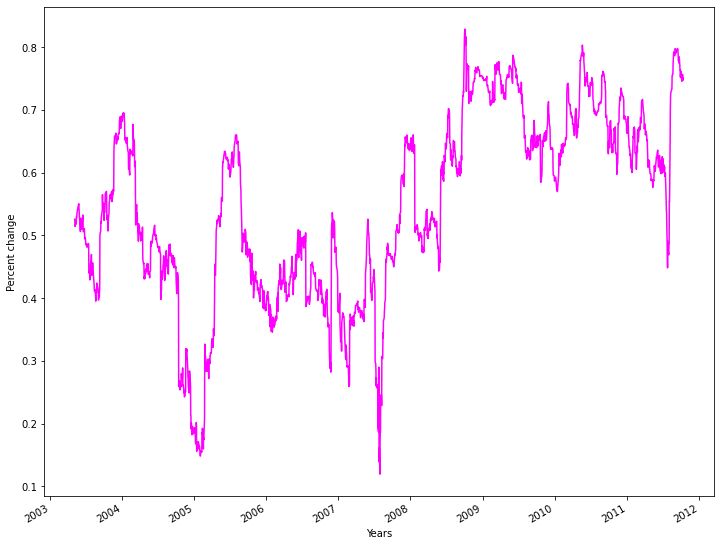

In [412]:
corr = returns.AAPL.rolling(90, min_periods=85).corr(spx_ret)
corr.plot(figsize=(12,10),color='magenta')


plt.xlabel("Years")
plt.ylabel("Percent change")

Text(0, 0.5, 'Percent change')

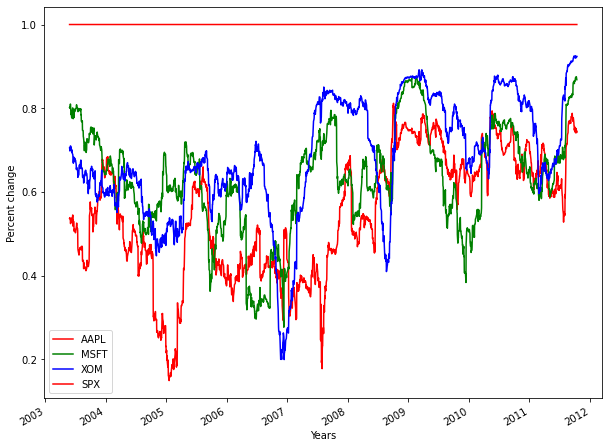

In [413]:
corr = returns.rolling(100, min_periods=100).corr(spx_ret)
corr.plot(figsize=(10,8),color=['red','green','blue'])

plt.xlabel("Years")
plt.ylabel("Percent change")

<AxesSubplot:>

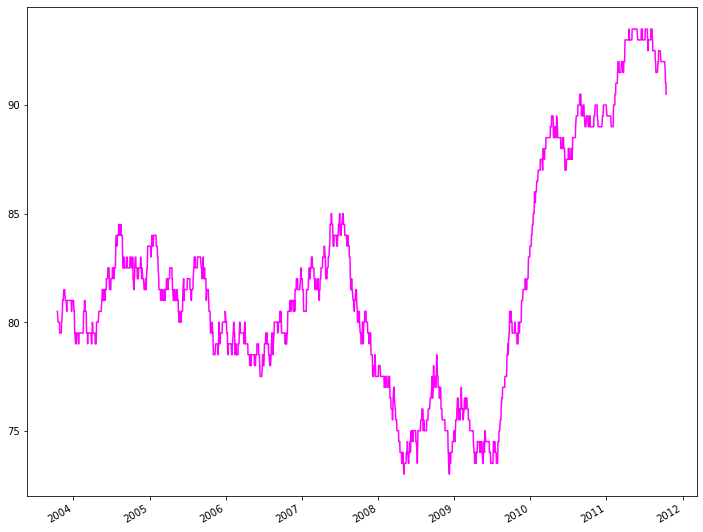

In [414]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(200).apply(score_at_2percent)
result.plot(figsize=(12,10),color='magenta')

# Question-4

In [415]:
df4 = pd.read_csv('4-kidney_disease.csv')
df4

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [416]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [417]:
df4.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [418]:
df4.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [419]:
df4.shape

(400, 26)

<AxesSubplot:>

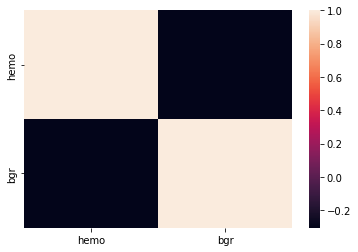

In [420]:
kidney = df4[['hemo','bgr','classification']]
sns.heatmap(kidney.corr())

In [421]:
kidney

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


### Data Cleaning

In [422]:
kidney.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [423]:
kidney.fillna(method='bfill',inplace=True)
kidney.isna().sum()

hemo              0
bgr               0
classification    0
dtype: int64

In [424]:
kidney.shape

(400, 3)

In [425]:
kidney.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


### Making it only 2 classes instead of 3

In [426]:
kidney.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

- we can see that, we are supposed to only have 2 classifications
- also ckd and ckd\t mean the same, thus we must modify

In [427]:
classification = np.array(kidney['classification'])
classification[:10]

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd'], dtype=object)

In [428]:
classification = classification.astype(str)
classification[:10]

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd'], dtype='<U6')

In [429]:
ln = len(classification)

In [434]:
for i in np.arange(ln):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [436]:
kidney['classification']=classification
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

### Label Encoding and Min Max Scalar

In [437]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [438]:
lab = LabelEncoder()
mms = MinMaxScaler()

In [439]:
kidney['classification']=lab.fit_transform(kidney['classification'])

In [440]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,12.388500,147.585000,0.375000
std,2.865265,79.444928,0.484729
min,3.100000,22.000000,0.000000
25%,10.400000,99.000000,0.000000
50%,12.500000,120.000000,0.000000
75%,14.800000,163.500000,1.000000
max,17.800000,490.000000,1.000000


In [441]:
cols = kidney.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [442]:
for i in cols:
    kidney[i]=mms.fit_transform(kidney[[i]])

### Splitting the data for training and validation

In [444]:
from sklearn.model_selection import train_test_split

In [445]:
y = kidney.pop('classification')

In [446]:
X = kidney

In [447]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [448]:
#now we have train and validation sets so we can deploy models

In [449]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()

In [450]:
knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=7)

In [451]:
dtc.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [452]:
svc.fit(X=X_train,y=y_train)

SVC()

In [453]:
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)

### Checking different metrics

In [454]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [455]:
#Knn
knn_acc = accuracy_score(y_test,knn_ypred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.9625


The confusion matrix is :


<AxesSubplot:>

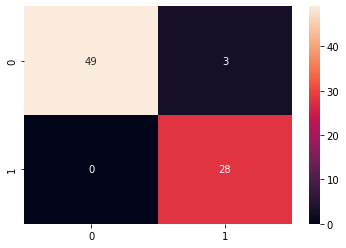

In [457]:
knn_conf = confusion_matrix(y_test,knn_ypred)

print('The confusion matrix is :')
sns.heatmap(knn_conf,cbar=True,annot=True)

In [458]:
# dtc
dtc_acc = accuracy_score(y_test,dtc_ypred)
print(f'Accuracy score : {dtc_acc}')

Accuracy score : 0.95


The confusion matrix is :


<AxesSubplot:>

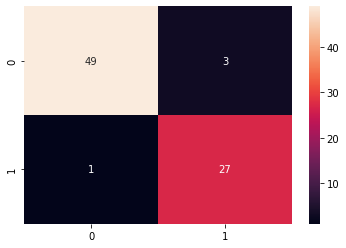

In [459]:
dtc_conf = confusion_matrix(y_test,dtc_ypred)

print('The confusion matrix is :')
sns.heatmap(dtc_conf,cbar=True,annot=True)

In [460]:
#svc
svc_acc = accuracy_score(y_test,svc_ypred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.95


The confusion matrix is :


<AxesSubplot:>

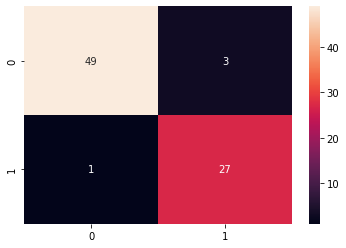

In [461]:
svc_conf = confusion_matrix(y_test,svc_ypred)

print('The confusion matrix is :')
sns.heatmap(svc_conf,cbar=True,annot=True)

### Comparing accuracies

In [462]:
accuraciesDf = pd.DataFrame()

In [463]:
accuraciesDf['Models'] = ['KNN', 'Decesion Tree', 'SVC']
accuraciesDf['accuracies'] = [knn_acc, dtc_acc, svc_acc]
accuraciesDf

,Models,accuracies
0,KNN,0.9625
1,Decesion Tree,0.9500
2,SVC,0.9500


- we can see that KNN is having a better accuracy metric than decesion tree or svc

### Given Question

Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD
Given that Alice has heamoglobin 0 std's above average and 1.1 std's above average so heamoglobin is (0std)+(mean(heamoglobin) and glucose is (1.1std)+mean(glucose)

In [464]:
hem = np.array(kidney['hemo'])
glu = np.array(kidney['bgr'])

In [465]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [466]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,0.631871,0.45484


now let us predict if alice has the disease or not

In [467]:
#knn
ali_knn = knn.predict(alice)
ali_dtc = dtc.predict(alice)
ali_svc = svc.predict(alice)

predicting using different models

In [468]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in KNN : {ali_dtc}')
print(f'Prediction of disease in KNN : {ali_svc}')

Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]


#### Answer
From the above predictions it is clear that Alice doesnot have tha disease beacuse all the prediction results are 0.

So alice does not have the disease.

# Question-6

In [469]:
df6 = pd.read_csv("6-Breast_cancer_data.csv")
df6

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [470]:
from sklearn.model_selection import train_test_split

x = df6.drop(['diagnosis'], axis=1)
y = df6['diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


### KNN Classifier

In [471]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict_1 = knn.predict(x_test)
y_predict_1

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### Decision Tree 

In [474]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict_2 = model.predict(x_test)
y_predict_2

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### SVC

In [475]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_predict_3 = rf.predict(x_test)
y_predict_3


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### Accuracies

In [476]:
from sklearn import metrics

In [477]:
print("Accuracy of K Neartest Neighbours : ",end=" ")
print(metrics.accuracy_score(y_predict_1,y_test))

print("Accuracy of Decision Tress : ",end=" ")
print(metrics.accuracy_score(y_predict_2,y_test))

print("Accuracy of Random Forest : ",end=" ")
print(metrics.accuracy_score(y_predict_3,y_test))

Accuracy of K Neartest Neighbours :  0.8947368421052632
Accuracy of Decision Tress :  0.8421052631578947
Accuracy of Random Forest :  0.9064327485380117


- from this we can see that random forest is having a better accuracy in predicting the values in comparison to knna and decesion tree
- but we cannot still be sure, therefore we resample and recalculate accuracies using cross validation

### KNN Cross Validation

In [478]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
tr=KNeighborsClassifier(n_neighbors=5)
tr1 = DecisionTreeClassifier()
tr2=RandomForestClassifier(n_estimators=100)

tr.fit(x_train, y_train)
results = model_selection.cross_val_score(tr, x_train, y_train, cv = kfold)
print("results for KNN: ")
print(results)
print("")


tr1.fit(x_train, y_train)
results1 = model_selection.cross_val_score(tr1, x_train, y_train, cv = kfold)
print("results for Decision Tree: ")
print(results1)
print("")


tr2.fit(x_train, y_train)
results2 = model_selection.cross_val_score(tr2, x_train, y_train, cv = kfold)
print("results for Random Forest: ")
print(results2)
print("")


results for KNN: 
[0.86466165 0.85714286 0.88636364]

results for Decision Tree: 
[0.86466165 0.87969925 0.90151515]

results for Random Forest: 
[0.87969925 0.90225564 0.93939394]



In [481]:
val=0
val1=0
val2=0
for i in np.arange(3):
    val+=results[i]
    val1+=results1[i]
    val2+=results2[i]

print('KNN', val/3)
print('Decesion Tree', val1/3)
print('Random Forest', val2/3)

KNN 0.8693893825472773
Decesion Tree 0.8819586845902635
Random Forest 0.9071162755373282


- After cross validation and taking the average of 3 acccuracies(for each sample) for each model, we can see that random forest classifier performs the best and then knn and then decesion tree 

# Question-7

In [483]:
df7 = pd.read_csv('7-Housing.csv')
df7

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [484]:
df7.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

- no need to fill or drop records

In [486]:
df7.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

<AxesSubplot:ylabel='Frequency'>

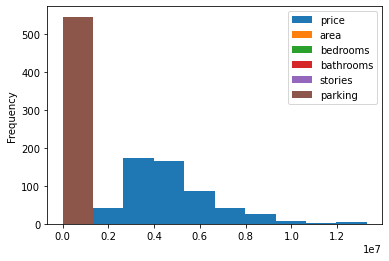

In [487]:
df7.plot.hist()

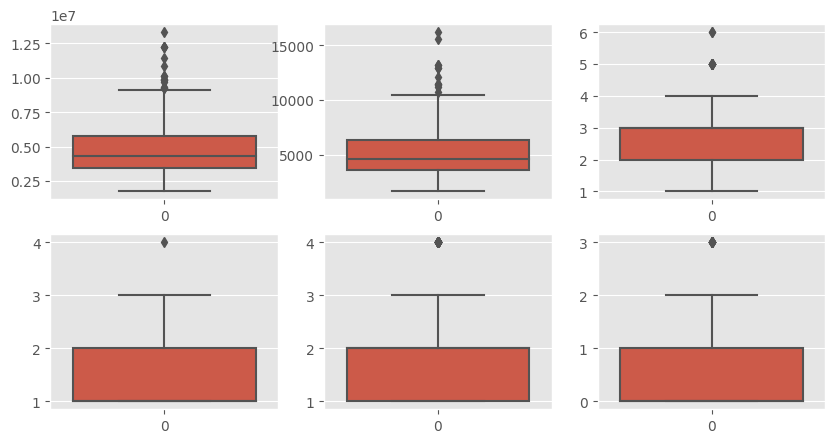

In [8]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df7['price'], ax = axs[0,0])
plt2 = sns.boxplot(df7['area'], ax = axs[0,1])
plt3 = sns.boxplot(df7['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df7['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df7['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df7['parking'], ax = axs[1,2])

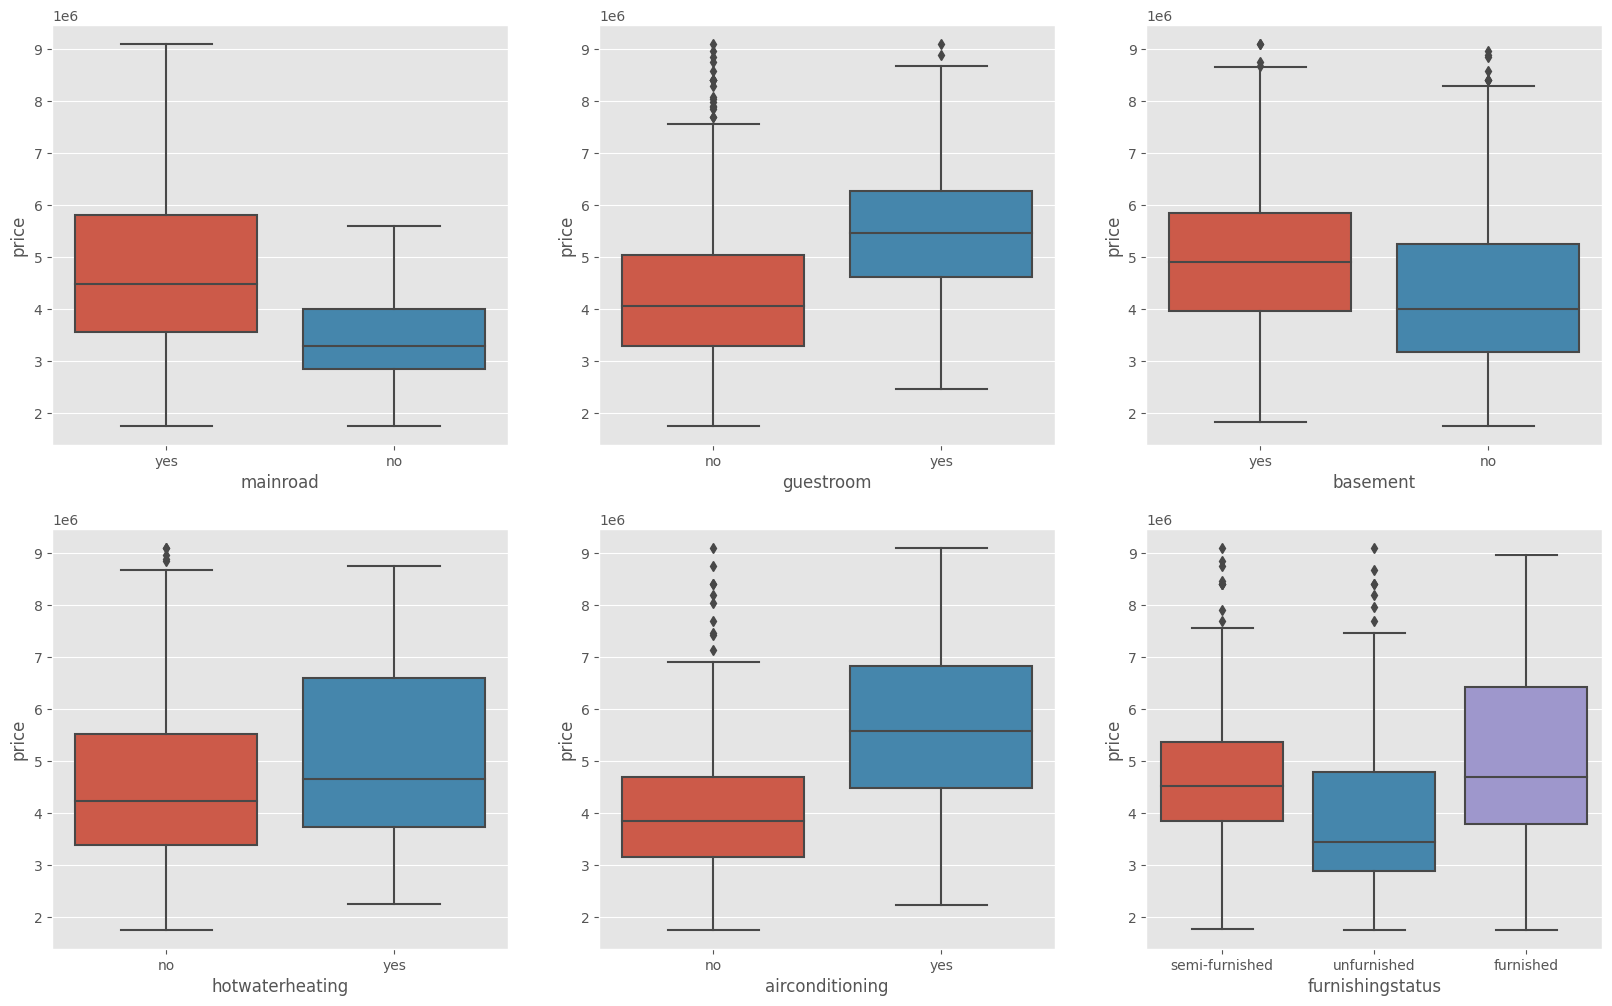

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df7)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df7)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df7)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df7)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df7)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df7)
plt.show()

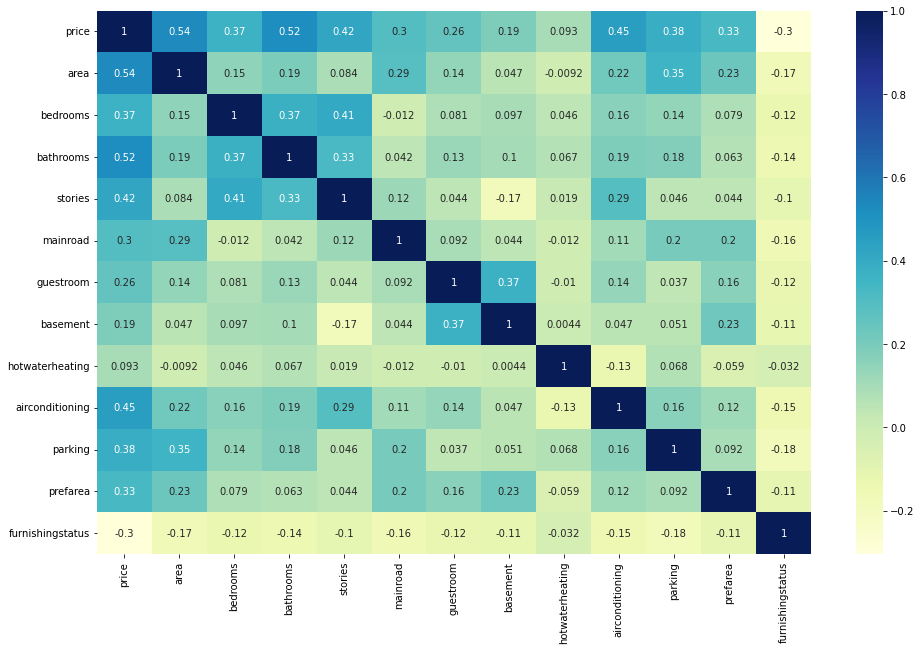

In [525]:
plt.figure(figsize = (16, 10))
sns.heatmap(df7.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [493]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df7.columns:
    if df7.dtypes[i]=='O':
        df7[i] = enc.fit_transform(df7[i])

    print(f'{i} : {df7[i].unique()}')

price : [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  49000

In [495]:
x = df7.drop(['price'], axis= 1)
y = df7['price']

In [496]:
df7.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [497]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ area + bedrooms + bathrooms + stories + mainroad + guestroom + basement + hotwaterheating + airconditioning + parking + prefarea + furnishingstatus', data=df7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          3.81e-123
Time:                        22:58:17   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.019e+05   2.62e+05      0.388      0.698   -4.14e+05    6.17e+05
area               243.9069     24.332     10.024      0.000     196.109     291.705
bedrooms          1.195e+05   7.27e+04      1.644      0.101   -2.33e+04    2.62e+05
bathrooms         9.889e+05   1.04e+05      9.551      0.000    7.85e+05    1.19e+06
stories           4.504e+05   6.43e+04      7.006      0.000    3.24e+05    5.77e+05
mainroad          4.231e+05   1.42e+05      2.970      0.003    1.43e+05    7.03e+05
guestroom          2.98e+05   1.32e+05      2.259      0.024    3.89e+04    5.57e+05
basement          3.579e+05    1.1e+05      3.243      0.001    1.41e+05    5.75e+05
hotwaterheating   8.729e+05   2.23e+05      3.909      0.000    4.34e+05    1.31e+06
airconditioning   8.536e+05   1.08e+05      7.879      0.000    6.41e+05    1.07e+06
parking           2.798e+05   5.86e+04      4.774      0.000    1.65e+05    3.95e+05
prefarea          6.471e+05   1.16e+05      5.585      0.000    4.19e+05    8.75e+05
furnishingstatus -2.132e+05   6.31e+04     -3.381      0.001   -3.37e+05   -8.93e+04
==============================================================================
Omnibus:                       94.906   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.728
Skew:                           0.872   Prob(JB):                     1.61e-54
Kurtosis:                       5.805   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


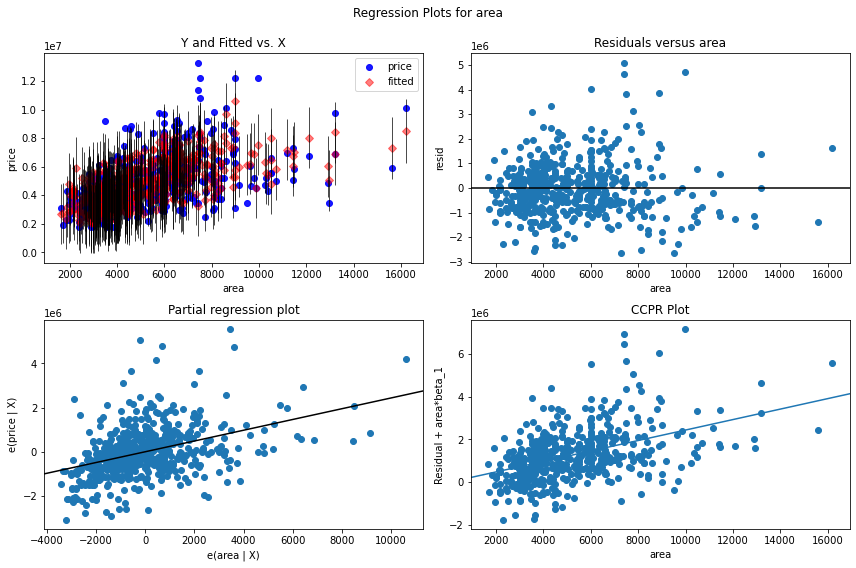

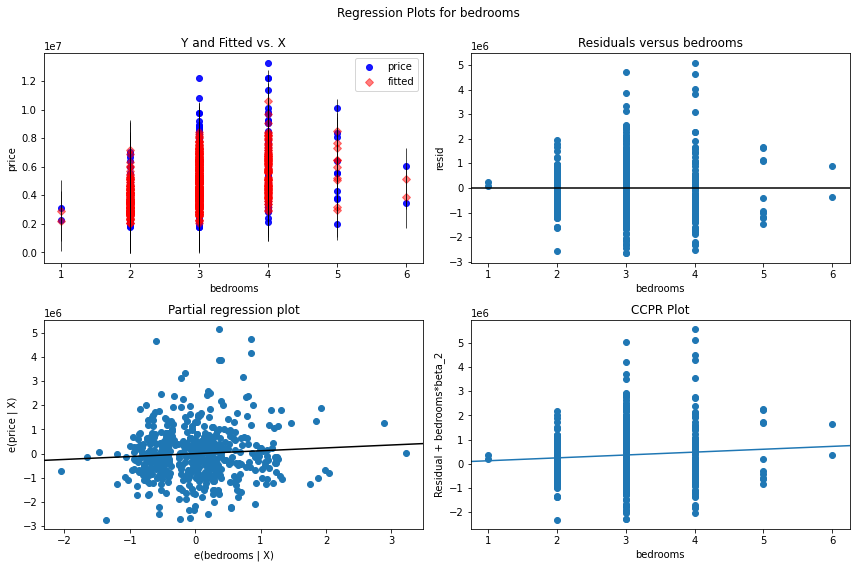

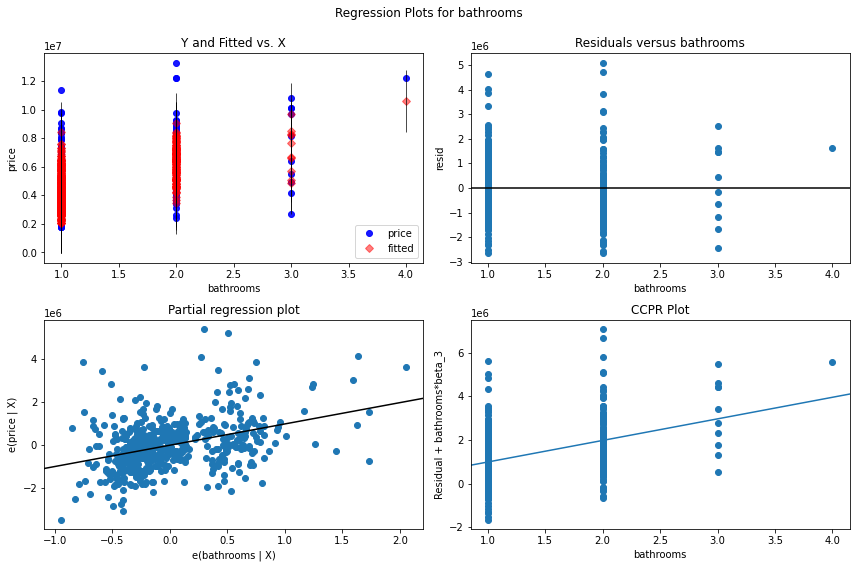

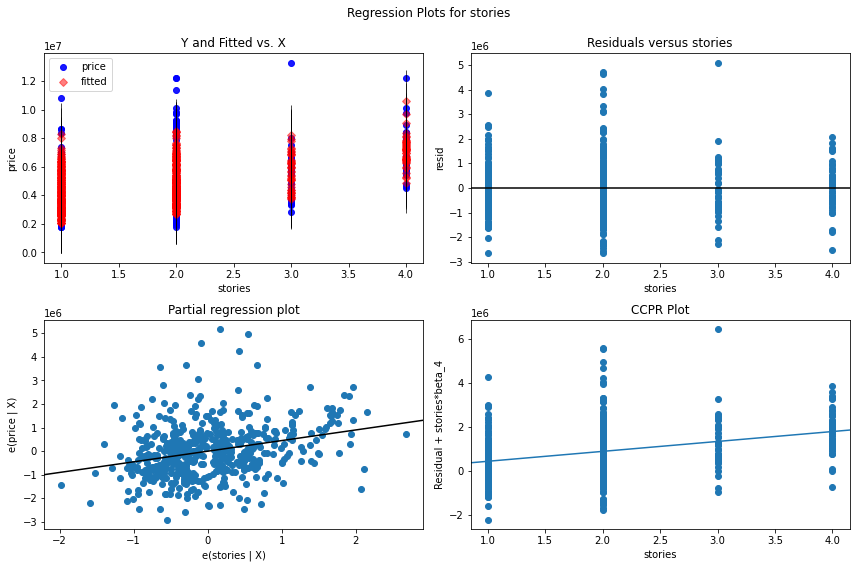

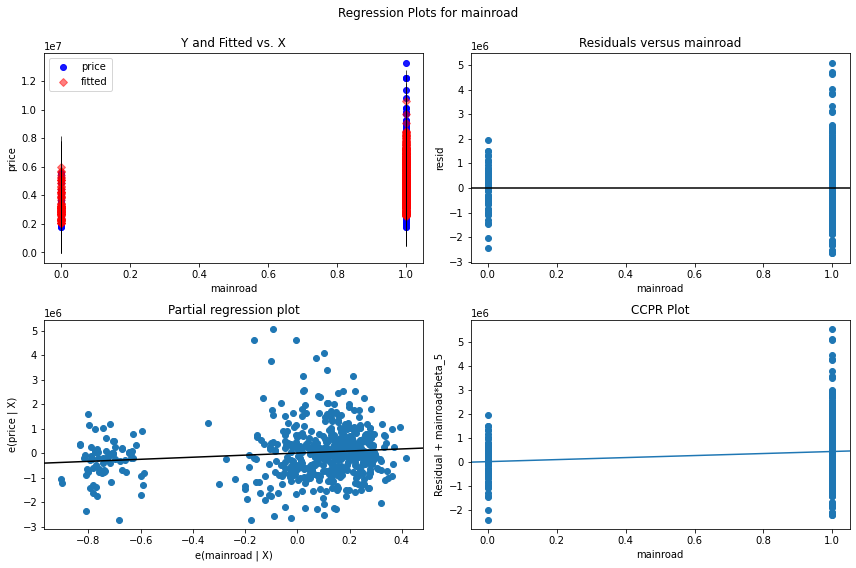

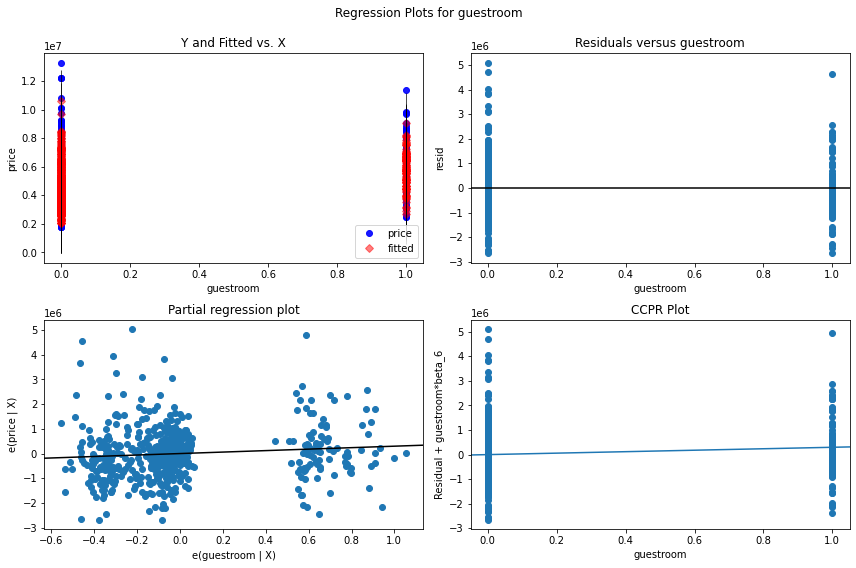

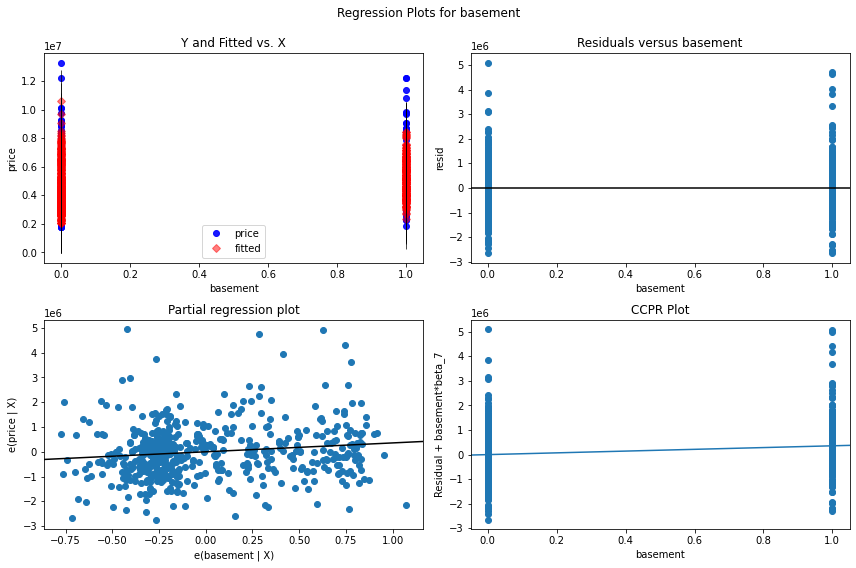

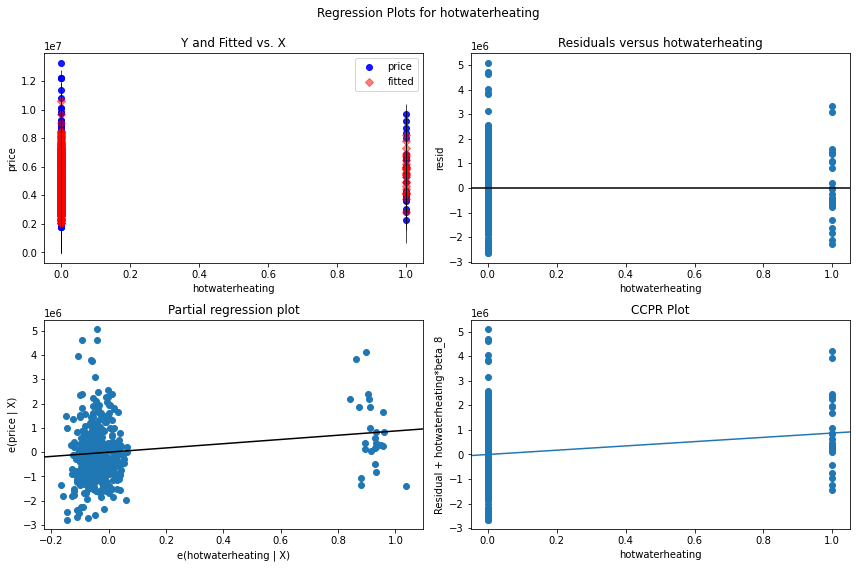

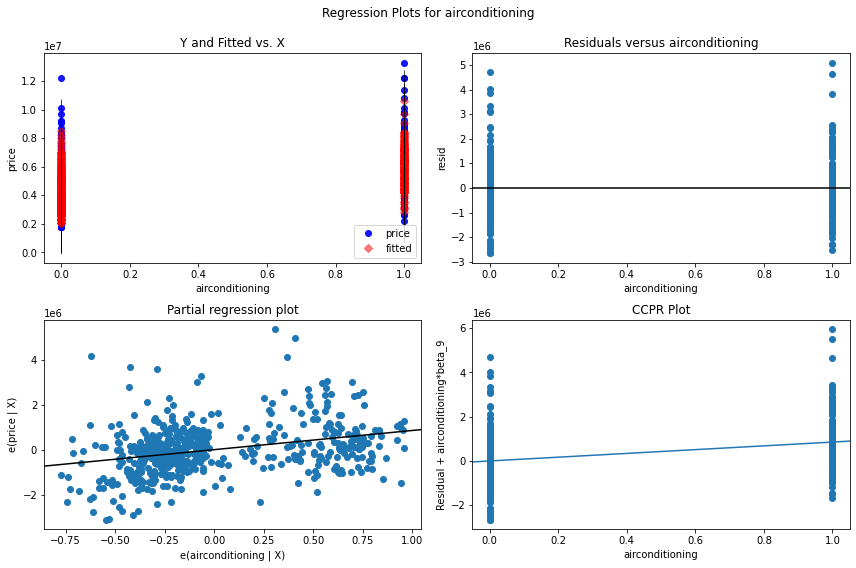

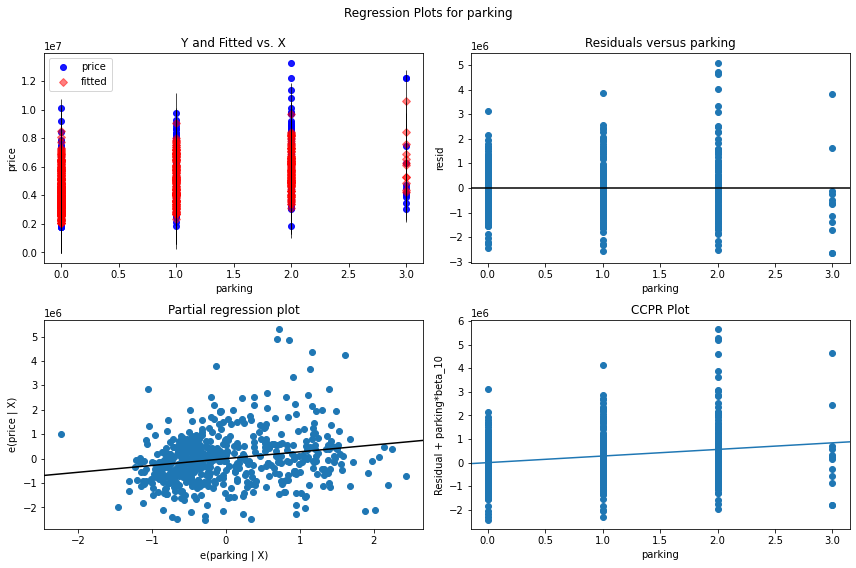

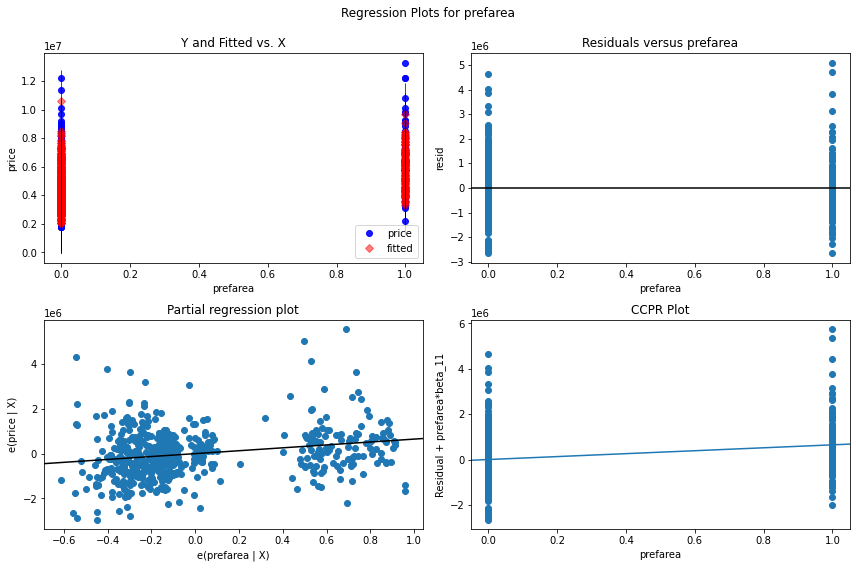

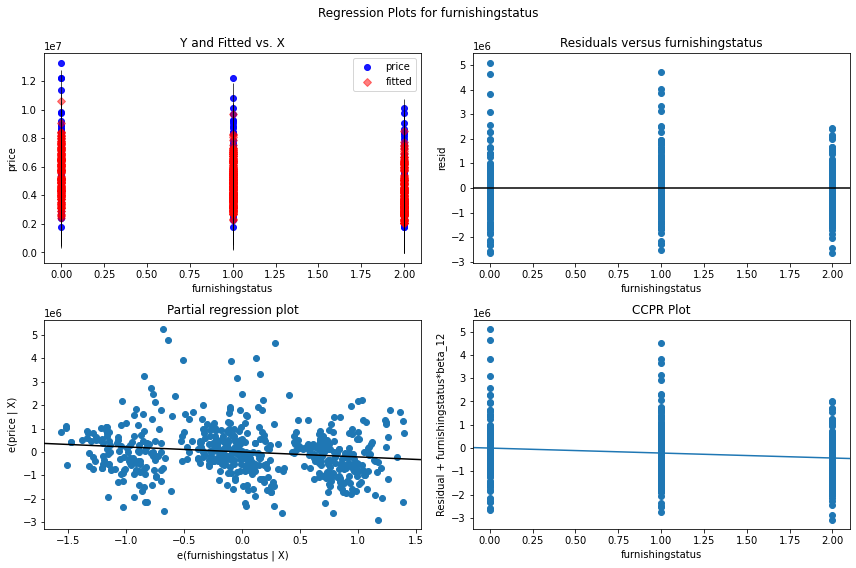

In [498]:
import matplotlib.pyplot as plt
for column in df7.columns:
    if column != 'price':
        fig = plt.figure(figsize=(12,8))
        fig = sm.graphics.plot_regress_exog(model, column, fig=fig)

In [499]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state=0)

In [500]:
from sklearn.linear_model import LinearRegression

logi = LinearRegression()
logi.fit(x_train, y_train)

y_pred = logi.predict(x_test)

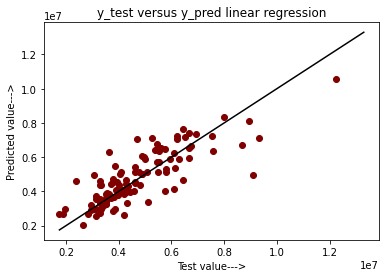

In [501]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred linear regression')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.show()

In [502]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 716583.439661547
MSE: 986041803890.027
RMSE: 992996.3765744702
R-Squared: 0.6578047592637595


***Using KNN***

In [503]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)

In [504]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predknn)
mse = metrics.mean_squared_error(y_test, y_predknn)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 1098423.623853211
MSE: 2706894553606.6514
RMSE: 1645264.280778821
R-Squared: 0.6578047592637595


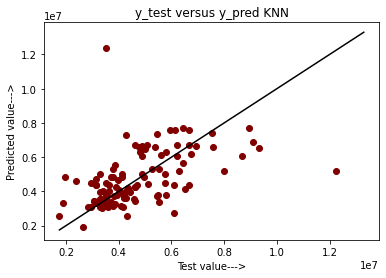

In [505]:
plt.scatter(y_test,y_predknn, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred KNN')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.show()

For the residual plot of the linear regression, the difference is mostly located around zero, with lesser variance than the residual plot of KNN.
The residual plot of the actual and predicted values also have very high variance for KNN , where KNN incorrectly predicted some values with a high difference(overestimation and underestimation) 

So, we can see the R-sqaured value of KNN(0.65) is much less than that of Linear Regression Model(0.80)

# Question-8

In [507]:
df8 = sns.load_dataset("titanic")
df8

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [509]:
x = df8.iloc[:,:-2]
y = df8.iloc[:,-1]

In [510]:
enc = LabelEncoder()
for i in x:
    if x[i].dtype == "O" or x[i].dtype == "float64" or x[i].dtype == "category" or x[i].dtype == "bool":
        x[i] = enc.fit_transform(x[i])

In [511]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)

In [512]:
logistic = LogisticRegression()

logistic.fit(x_train,y_train)

LogisticRegression()

In [513]:
y_predict = logistic.predict(x_test)
y_predict

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,

In [514]:
from sklearn.metrics import accuracy_score
print("Accuracy (Logistic Regression) : ", accuracy_score(y_predict,y_test))

Accuracy (Logistic Regression) :  0.9943899018232819


- As we can see we are getting a high accuracy in case of using logistic regression model for this particular dataset

In [519]:
logistic.fit(x_train,y_train)
results = model_selection.cross_val_score(logistic, x_train, y_train, cv = kfold)
print("results for KNN: ")
print(results)

results for KNN: 
[0.9        0.98305085 0.98305085]


In [521]:
print('Average of Cross Validation Accuracies : ', results.mean())

Average of Cross Validation Accuracies :  0.9553672316384181


- we are still getting a high accuracy after performing cross validation with this model

In [522]:
#end